# Auto ARIMA

## #01. 작업준비

### [1] 패키지 가져오기

`pmdarima` 패키지의 설치가 필요하다

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.timeserise import *

from pmdarima.arima import auto_arima
from matplotlib import pyplot as plt
from matplotlib import dates
import seaborn as sb

### [2] 데이터 가져오기

#### DateTimeIndex 형태로 설정

In [2]:
origin = my_read_excel("https://data.hossam.kr/tsdata/air_passengers.xlsx", index_col="Month", timeindex=True, info=False)

#### DateTimeIndex 확인

In [3]:
origin.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

## #02. 데이터 전처리

### [1] 훈련, 검증 데이터 분리

시계열 데이터 특성상 데이터가 순서대로 배치되어야 하므로 슬라이싱을 사용해야 한다.

In [4]:
# 처음부터 70% 위치 전까지 분할
train = origin[:int(0.7*len(origin))]
my_pretty_table(train.head())

# 70% 위치부터 끝까지 분할
test = origin[int(0.7*len(origin)):]
my_pretty_table(test.head())

+---------------------+--------------+
| Month               |   Passengers |
|---------------------+--------------|
| 1949-01-01 00:00:00 |          112 |
| 1949-02-01 00:00:00 |          118 |
| 1949-03-01 00:00:00 |          132 |
| 1949-04-01 00:00:00 |          129 |
| 1949-05-01 00:00:00 |          121 |
+---------------------+--------------+
+---------------------+--------------+
| Month               |   Passengers |
|---------------------+--------------|
| 1957-05-01 00:00:00 |          355 |
| 1957-06-01 00:00:00 |          422 |
| 1957-07-01 00:00:00 |          465 |
| 1957-08-01 00:00:00 |          467 |
| 1957-09-01 00:00:00 |          404 |
+---------------------+--------------+


## #03. 분석 모형 구축

시계열 데이터를 ARIMA 모델에 맞추려고 할 때 첫 번째 목표는 측정항목을 최적화하는 $ARIMA(p,d,q)(P,D,Q,s)$ 값을 찾는 것

계절성을 의미하는 $s$값은 분석가가 판단하여 지정해야 한다.

$(p,d,q)(P,D,Q)$값은 분석가가 최소값과 최대값을 지정한다.

$s$ 값을 고정한 상태에서 `0`부터 $(p,d,q)(P,D,Q)$ 로 주어진 값의 범위 안에서 최적의 값을 검색한다.

> 오래걸린다...

In [5]:
my_p = 3    # 적절히 넉넉히
my_d = 2    # 차분 횟수 (검증한 결과를 활용)
my_q = 3    # 적절히 넉넉히
my_s = 12   # 계절성 주기 (분석가가 판단)

model = auto_arima(
    y        = train,          # 모델링하려는 시계열 데이터 또는 배열
    start_p  = 0,              # p의 시작점
    max_p    = my_p,           # p의 최대값
    d        = my_d,           # 차분 횟수
    start_q  = 0,              # q의 시작점
    max_q    = my_q,           # q의 최대값
    seasonal = True,           # 계절성 사용 여부
    m        = my_s,           # 계절성 주기
    start_P  = 0,              # P의 시작점
    max_P    = my_p,           # P의 최대값
    D        = my_d,           # 계절성 차분 횟수
    start_Q  = 0,              # Q의 시작점
    max_Q    = my_q,           # Q의 최대값
    trace    = True            # 학습 과정 표시 여부
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,2,0)[12]             : AIC=700.560, Time=0.06 sec
 ARIMA(1,2,0)(1,2,0)[12]             : AIC=628.108, Time=0.18 sec
 ARIMA(0,2,1)(0,2,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(1,2,0)(0,2,0)[12]             : AIC=656.611, Time=0.06 sec
 ARIMA(1,2,0)(2,2,0)[12]             : AIC=618.256, Time=0.91 sec
 ARIMA(1,2,0)(3,2,0)[12]             : AIC=614.066, Time=1.49 sec
 ARIMA(1,2,0)(3,2,1)[12]             : AIC=inf, Time=5.50 sec
 ARIMA(1,2,0)(2,2,1)[12]             : AIC=inf, Time=4.00 sec
 ARIMA(0,2,0)(3,2,0)[12]             : AIC=652.212, Time=1.17 sec
 ARIMA(2,2,0)(3,2,0)[12]             : AIC=606.557, Time=4.21 sec
 ARIMA(2,2,0)(2,2,0)[12]             : AIC=612.571, Time=1.00 sec
 ARIMA(2,2,0)(3,2,1)[12]             : AIC=inf, Time=10.37 sec
 ARIMA(2,2,0)(2,2,1)[12]             : AIC=inf, Time=4.05 sec
 ARIMA(3,2,0)(3,2,0)[12]             : AIC=604.074, Time=3.87 sec
 ARIMA(3,2,0)(2,2,0)[12]             : AIC=607.624, 

## #04. 예상치 생성

### [1] 검증데이터에 대한 예측치

훈련데이터 이후 `n_periods`개의 예측치를 생성한다.

In [6]:
pred = model.predict(n_periods=int(len(test))+12 )
pred[:5]

1957-05-01    355.463949
1957-06-01    411.566883
1957-07-01    464.386221
1957-08-01    443.121623
1957-09-01    393.594245
Freq: MS, dtype: float64

### [2] 관측치와 예상치 비교

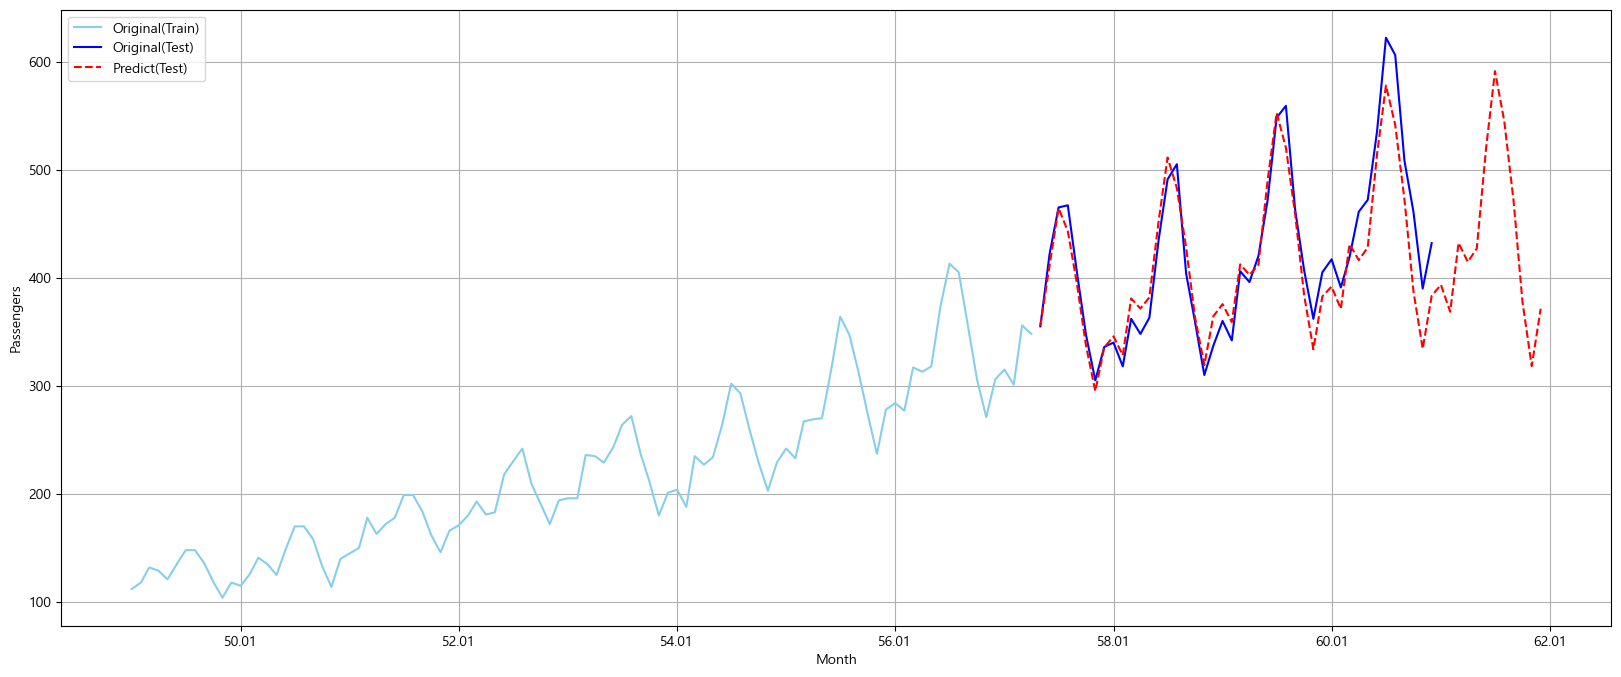

In [7]:
fig = plt.figure(figsize=(20,8), dpi=100)
ax = fig.gca()

# 훈련데이터 - 앞 70%의 원본 데이터
sb.lineplot(data=train, x=train.index, y='Passengers', label='Original(Train)', color='skyblue', ax=ax)

# 검증데이터 - 뒤 30%의 원본 데이터
sb.lineplot(data=test, x=test.index, y='Passengers', label='Original(Test)', color='blue', ax=ax)

# 예측치 - 뒤 30% + 12단계에 대한 예측 데이터
sb.lineplot(x=pred.index, y=pred.values, label='Predict(Test)', linestyle='--', color='red', ax=ax)

ax.grid()
ax.set_xlabel('Month')
ax.set_ylabel('Passengers')

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = dates.DateFormatter('%y.%m')
ax.xaxis.set_major_formatter(monthyearFmt)

plt.show()
plt.close()

## #05. 성능평가 - 잔차 플롯 검토

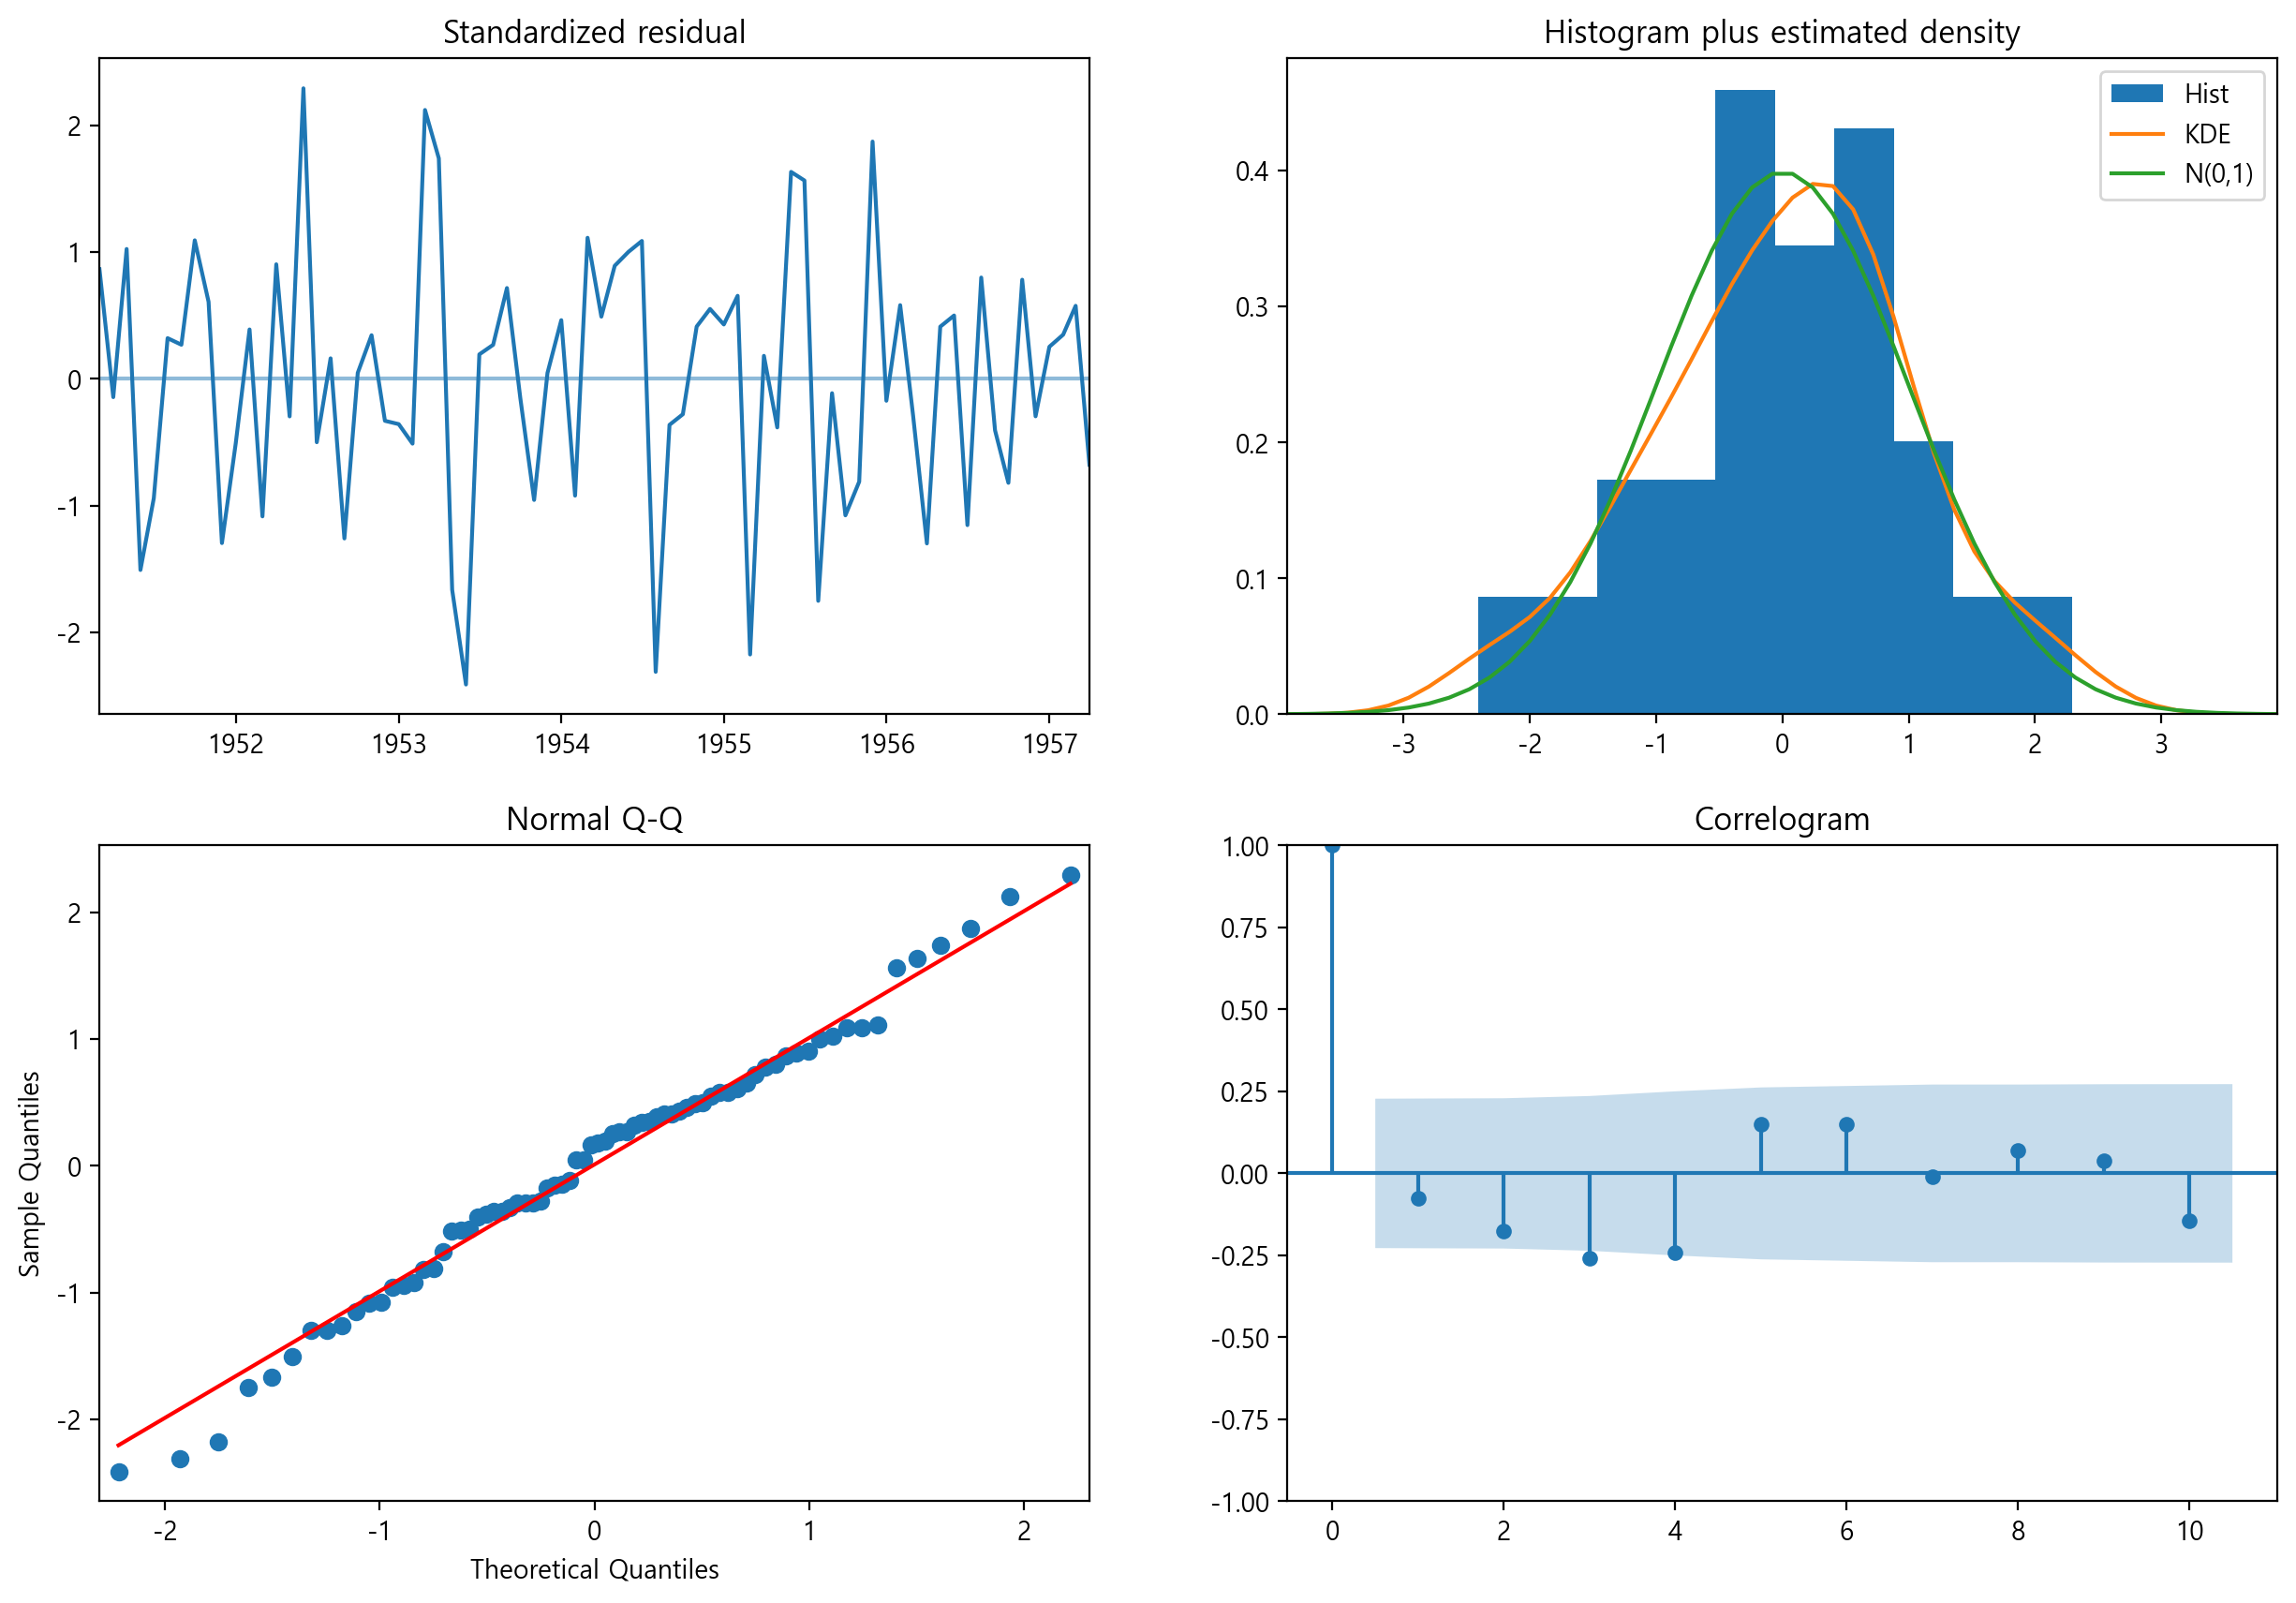

In [8]:
model.plot_diagnostics(figsize=(15, 10))
plt.show()
plt.close()

- 왼쪽 상단: 잔차 오차는 평균 0을 중심으로 변동하고 균일한 분산을 갖는 것으로 보임
- 오른쪽 상단: 밀도는 평균이 0인 정규 분포를 나타냄
- 왼쪽 하단: 모든 점이 빨간색 선과 일치해야 함. 편차가 크면 분포가 왜곡되었음을 의미.
- 오른쪽 아래: ACF 플롯

> 전반적으로 잘 맞는것 같다!!!